## 웹 스크래핑

- BeautifulSoup 등 웹 스크래핑 도구로 수집한 데이터를 판다스 데이터프레임으로 정리하는 방법을 설명한다.
- 먼저 스크래핑한 내용을 파이썬 리스트, 딕셔너리 등으로 정리한 뒤 DataFrame() 함수에 리스트나 딕셔너리 형태로 전달하여 데이터프레임으로 변환한다.

In [12]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# 위키피디아 미국 ETF 웹 페이지에서 필요한 정보를 스크래핑하여 딕셔너리 형태로 변수 etfs에 저장
url = "https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')
# print(soup)
rows = soup.select('div > ul > li')
# print(rows)
    
etfs = {}
for row in rows:
    
    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)
        
        if (len(etf_ticker) > 0) & (len(etf_market) > 0) & (len(etf_name) > 0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass    

# etfs 딕셔너리 출력
print(etfs)
print('\n')

# etfs 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(etfs)
print(df)

{}


Empty DataFrame
Columns: []
Index: []


### API 활용하여 데이터 수집하기

- 인터넷 서비스 업체에서 제공하는 api를 통해서 수집한 데이터를 판다스 자료구조로 변환하는 방식으로 데이터를 수집한다.
- 대부분의 api는 판다스에서 쉽게 읽어올 수 있는 파일형식(csv, json, xml, ....)을 지원한다. 따라서 api를 통해서 가져온 데이터를 판다스 데이터 프레임으로 손쉽게 변환 할 수 있다.
- 이 책에서는 구글 지오코드 api를 예를 들어 설명한다. (구글 지오코딩이란 장소 이름 또는 주소를 입력하면 위도와 경도 좌표 정보를 변환해 주는 서비스이다. 사용자 인증후 api 키를 발급받아야한다.)
- 또한 지오코딩을 사용하기 위해 아나콘다 배포판에 googlemaps 라이브러리를 설치해야한다.


In [14]:
!pip install googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38552 sha256=6ed984cd1f7c731ea2934943d7a64bfe832198111840aa1723ef91fab0f145f2
  Stored in directory: /home/jackjack/.cache/pip/wheels/b6/23/aa/a130b53682531f8382dd06f2000001225bea7b56a99c516f87
Successfully built googlemaps

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: python -m pip install --upgrade pip


In [17]:
# -*- coding: utf-8 -*-

## google 지오코딩 API 통해 위도, 경도 데이터 가져오기 

# 라이브러리 가져오기
import googlemaps
import pandas as pd

# my_key = "----발급받은 API 키를 입력-----"

# 구글맵스 객체 생성하기
maps = googlemaps.Client(key="mykey")  # my key값 입력

lat = []  #위도
lng = []  #경도

# 장소(또는 주소) 리스트
places = ["서울시청", "국립국악원", "해운대해수욕장"]

i=0
for place in places:   
    i = i + 1
    try:
        print(i, place)
        # 지오코딩 API 결과값 호출하여 geo_location 변수에 저장
        geo_location = maps.geocode(place)[0].get('geometry')
        lat.append(geo_location['location']['lat'])
        lng.append(geo_location['location']['lng'])
        
    except:
        lat.append('')
        lng.append('')
        print(i)

# 데이터프레임으로 변환하기
df = pd.DataFrame({'위도':lat, '경도':lng}, index=places)
print('\n')
print(df)

1 서울시청
2 국립국악원
3 해운대해수욕장


                위도          경도
서울시청     37.566535  126.977969
국립국악원    37.477759  127.008304
해운대해수욕장  35.158698  129.160384


- 데이터 분석과 머신러닝을 공부할 때 데이터셋을 제공하는 곳을 알아두면 좋다.
    1. 사이킷런, 시본등 파이썬 라이브러리 제공 데이터 셋
    2. 캐글
    3. UCI 머신러닝 저장소
    4. 공공데이터(worldbank, WTO등 국제기구, 공공데이터 포탈, 국가통계포털)

## 데이터 저장하기

### CSV 파일로 저장

- 판다스 데이터프레임은 2차원 배열로 구조화된 데이터이기 때문에 2차원 구조를 갖는 CSV 파일로 변환할 수 있다.
- to_csv() 메소드를 적용한다.
- csv파일을 저장할 파일 경로와 파일명(확장자포함)을 '' 안에 입력한다.

In [18]:
import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_csv() 메소드를 사용하여 CSV 파일로 내보내기. 파열명은 df_sample.csv로 저장
df.to_csv("./df_sample.csv")

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


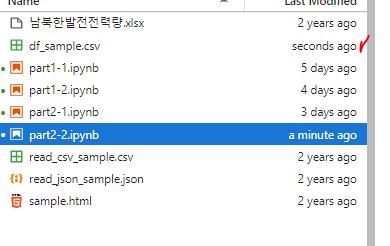

파일이 생긴 것을 볼 수 있다.

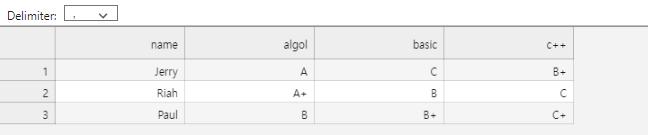

내부를 보면 쉼표로 구분되어 2차원 구조가 확인이 된다.

### json 파일로 저장

- 이또한 csv 파일 저장하는 방법과 동일로 to_json() 메서드를 이용하고, 이후 과정은 확장자이름만 다르지 똑같다.

In [19]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_json() 메소드를 사용하여 JSON 파일로 내보내기. 파열명은 df_sample.json로 저장
df.to_json("./df_sample.json")

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


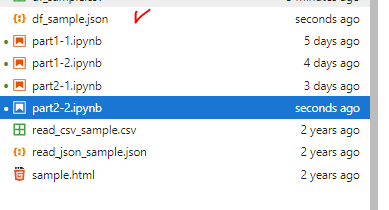

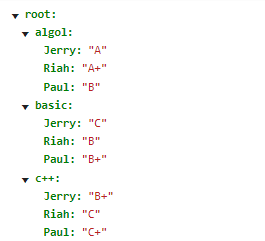

json 형태로 저장이 되었다.

### Excel 파일로 저장

- 데이터프레임은 엑셀파일과 아주 유사한 구조를 갖는다. 데이터프레임의 행과열은 엑셀파일의 행과 열로 일대일로 대응된다. 데이터프레임을 엑셀파일로 저장할 때는 to_excel() 메서드를 적용한다.
- 단, to_excel()메서드를 사용하려면 openpyxl 라이브러리를 사전에 설치해야한다. 아나콘다 배포판에는 기본적으로 제공된다.

In [21]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장 
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_excel() 메소드를 사용하여 엑셀 파일로 내보내기. 파열명은 df_sample.xlsx로 저장
df.to_excel("./df_sample.xlsx")

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


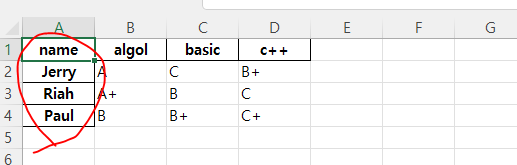

내부에는 이런 형태를 가지고 네임이 행인덱스로 지정되어있다.

### 여러 개의 데이터프레임을 하나의 Excel 파일로 저장

- 판다스 ExcelWriter() 함수는 Excel 워크북 객체를 생성, 워크북 객체는 우리가 알고있는 엑셀파일이라고 생각하면 된다.
- 데이터프레임에 to_excel() 메서드를 적용할 때 삽입하려는 워크북 객체를 인자로 전달하면 된다. 또한 sheet_name 옵션에 Excel 파일의 시트이름을 입력하여 삽입되는 시트 위치를 지정 할 수 있음.
- 같은 엑셀파일에 서로 다른 시트에 여러 데이터프레임을 구분하여 저장가능.

In [24]:
# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df1, df2에 저장 
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
         'algol' : [ "A", "A+", "B"],
         'basic' : [ "C", "B", "B+"],
          'c++' : [ "B+", "C", "C+"]}

data2 = {'c0':[1,2,3], 
         'c1':[4,5,6], 
         'c2':[7,8,9], 
         'c3':[10,11,12], 
         'c4':[13,14,15]}

df1 = pd.DataFrame(data1)
df1.set_index('name', inplace=True)      #name 열을 인덱스로 지정
print(df1)
print('\n')

df2 = pd.DataFrame(data2)
df2.set_index('c0', inplace=True)        #c0 열을 인덱스로 지정
print(df2)

# df1을 'sheet1'으로, df2를 'sheet2'로 저장 (엑셀파일명은 "df_excelwriter.xlsx")
writer = pd.ExcelWriter("./df_excelwriter.xlsx")
df1.to_excel(writer, sheet_name="sheet1")
df2.to_excel(writer, sheet_name="sheet2")
writer.save()

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


    c1  c2  c3  c4
c0                
1    4   7  10  13
2    5   8  11  14
3    6   9  12  15


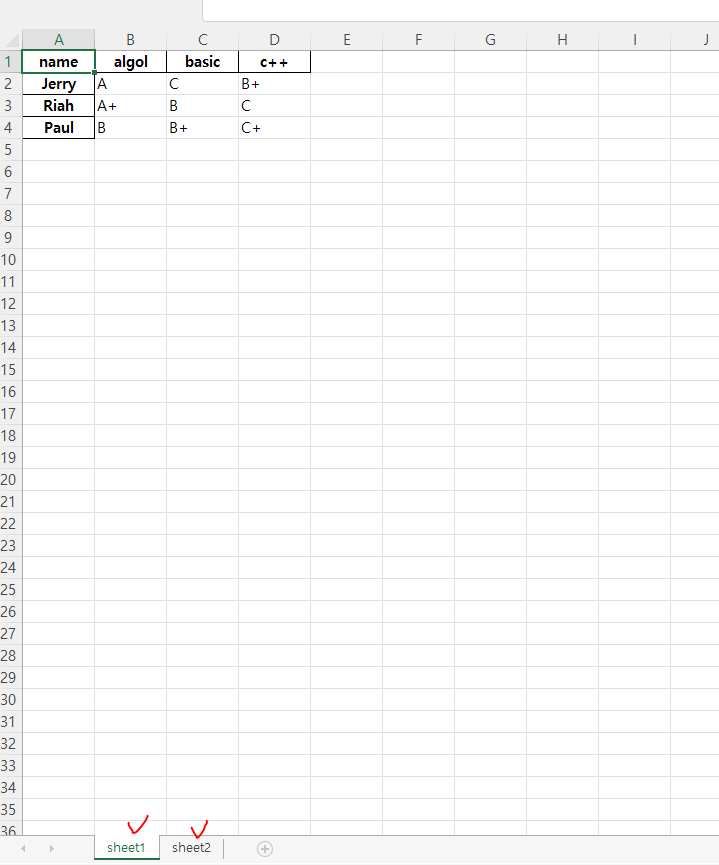

이렇게 시트가 두개가 생기고 해당하는 데이터가 들어간다.   
ExcelWriter() 함수로 생성한 워크북 객체를 writer 변수에 저장하고 "./df_excelwriter.xlsx" 라는 경로에 저장한다.

df1 과 df2에 to_excel()메서드를 적용하면서 sheet_name 옵션을 다르게 입력하여 writer 변수가 가르키는 excel 파일 (워크북객체)의 서로 다른 시트에 각각 구분하여 데이터가 삽입된다.